In [94]:
import numpy as np
import json
import matplotlib.pyplot as plt 
from scipy.spatial import Delaunay 
import skimage as sk
import scipy as sci
import cv2
import os 
from scipy.interpolate import interp2d


In [96]:
os.getcwd()

'/Users/admin/CS180/Morphing/src'

In [5]:
#Triangle Vert is a 3x2 array
def imgToTriangle(triangleVert, img):
    mask = sk.draw.polygon2mask(img.shape[0:3], triangleVert)
    # print(mask.shape)
    return img * mask
   #return np.stack(img[:,:,0] * mask, img[:,:,1] * mask, img[:,:,2] * mask, axis=2)

In [83]:
#Inverse transform from t1 to t2
def affineTrans(triIndex, t1Points, t1Simplicies, t2Points):
    t1 = [t1Points[i] for i in t1Simplicies[triIndex]]
    t2 = [t2Points[i] for i in t1Simplicies[triIndex]]
    # print(t1)
    # print(t2)
    t1Vec = np.array([t1[0] - t1[1],  t1[0] - t1[2]]).T
    t2Vec = np.array([t2[0] - t2[1],  t2[0] - t2[2]]).T
    # print(t1Vec)
    # print(t2Vec)
    t1VecToRight = np.eye(3)
    t1VecToRight[0:2, 0:2] = t1Vec
    t1VecToRight[0:2, 2] = t1[0]
    t1VecToRight = np.linalg.inv(t1VecToRight)

    rightToT2 = np.eye(3)
    rightToT2[0:2, 0:2] = t2Vec
    rightToT2[0:2, 2] = t2[0]

    return rightToT2 @ t1VecToRight
    

In [822]:
def warpImg(im1Points, im1Tri, im2Points, img):
    warpedIm2 = np.zeros_like(img).astype(np.float64)
    for i in range(0, len(im1Tri.simplices)):
        maskedIm2 = imgToTriangle([[im2Points[i][1],im2Points[i][0]] for i in im1Tri.simplices[i]], img)
        inverseMap = affineTrans(i, im1Points, im1Tri.simplices, im2Points)
        triangle = np.clip(sk.transform.warp(maskedIm2, inverseMap), 0, 1)
        # mask = (np.where(maskedIm2 > 0, 1, 0)) + (np.where(triangle > 0, 1, 0))
        # mask = np.where(mask == 2, 0, 1)
        # print(mask.shape)
        warpedIm2 += triangle
        print(np.argwhere(warpedIm2 > 1).shape)
    return warpedIm2
# thomasAvg = warpImg(averagePoints, triAverage, im2Points, thomasImg)
# plt.imshow(thomasAvg)

In [818]:
def warpWithRatio(im1, im1Points, im2, im2Points, crossRatio, morphRatio):
    # averageImg = np.average([im2Points[0], im2Points[0]], weights=[morphRatio, 1-morphRatio], axis=0)
    averagePoints = [np.average(a, weights=[morphRatio, 1-morphRatio], axis=0) for a in zip(im1Points, im2Points)]
    averagePoints = np.array(averagePoints) 
    triAverage = Delaunay(averagePoints)
    img1Warp = warpImg(averagePoints, triAverage, im1Points, im1)
    img2Warp = warpImg(averagePoints, triAverage, im2Points, im2)
    interpolatedImg = img1Warp * crossRatio + img2Warp * (1-crossRatio)
    # interpolatedImg = np.clip(interpolatedImg, 1, 0)
    
    return img2Warp


In [98]:
with open('../../Morphing/Photos/fullBodyV3.json') as jsonFile:
    keyPoints = json.load(jsonFile)

In [84]:
im1Points = np.array(keyPoints['im1Points'])
im2Points = np.array(keyPoints['im2Points'])
im1 = plt.imread('../../Morphing/Photos/diddyRescaled.jpg')
im2 = plt.imread('../../Morphing/Photos/thomasRescaled.jpg')

In [823]:
for i in range(0, 1):
    print(f"loop {i}")
    test = warpWithRatio(im1, im1Points, im2, im2Points, 0.1 * i, 0.1 * i)
    # plt.imsave(f'../morphOut/output_{i}.png', test)

loop 0
(0, 3)
(952, 3)
(952, 3)
(988, 3)
(8796, 3)
(8799, 3)
(8811, 3)
(8811, 3)
(9444, 3)
(9444, 3)
(11783, 3)
(11799, 3)
(11799, 3)
(12105, 3)
(12105, 3)
(12105, 3)
(12108, 3)
(12114, 3)
(12119, 3)
(17399, 3)
(17420, 3)
(17421, 3)
(17428, 3)
(17435, 3)
(17466, 3)
(17466, 3)
(17515, 3)
(17684, 3)
(17691, 3)
(17697, 3)
(17770, 3)
(17773, 3)
(17818, 3)
(17822, 3)
(17823, 3)
(17823, 3)
(17828, 3)
(17829, 3)
(17845, 3)
(17857, 3)
(17857, 3)
(17858, 3)
(17861, 3)
(17862, 3)
(17862, 3)
(17862, 3)
(17863, 3)
(17864, 3)
(17865, 3)
(17868, 3)
(17870, 3)
(17870, 3)
(17870, 3)
(17870, 3)
(17871, 3)
(17873, 3)
(17875, 3)
(17875, 3)
(17878, 3)
(17878, 3)
(17881, 3)
(17881, 3)
(17881, 3)
(17881, 3)
(17881, 3)
(17886, 3)
(17888, 3)
(17890, 3)
(17890, 3)
(17890, 3)
(17890, 3)
(17891, 3)
(17892, 3)
(17892, 3)
(17893, 3)
(17897, 3)
(17899, 3)
(17902, 3)
(17902, 3)
(17902, 3)
(17903, 3)
(17904, 3)
(17904, 3)
(17910, 3)
(17911, 3)
(17911, 3)
(17911, 3)
(17915, 3)
(17916, 3)
(17916, 3)
(17916, 3)
(17917, 

In [820]:
np.max(test)

np.float64(6.121568627450385)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..6.121568627450385].


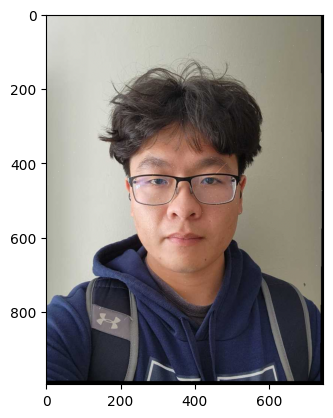

In [821]:
plt.imshow(test)

In [809]:
test1 = test.copy()
test1[test1 > 1] = 0

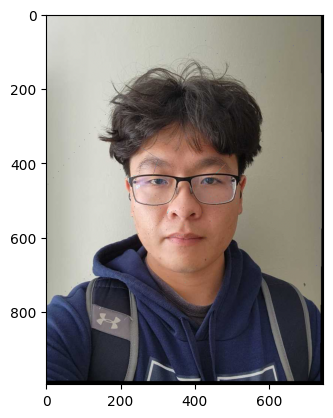

In [812]:
plt.imshow(test1)
plt.imsave('../testing/output.png', test1)

In [106]:
from scipy.interpolate import griddata

In [111]:
grid_x, grid_y = np.mgrid[0:test.shape[0], 0:test.shape[1]]
points = np.meshgrid(np.linspace(0, test.shape[0]), np.linspace(0, test.shape[1]))
print(test[:,:,0].shape)
print(len(points))
grid_z0 = griddata(points, test[:,:,0], (grid_x, grid_y), method='nearest')


(995, 746)
2


ValueError: different number of values and points